# Costumer Segmentation
## In this project we want to extract the number of costumer types, i.e., costumer segmentation by using the KMeans algorithm (unsupervised ML) to cluster the data.


### 1)Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


### 2) Load the data and study the quality

In [2]:
data=pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


The number of rows are: 200
The number of columns are: 5
Column names: ['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']


Inspect the types of each columns
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Inspect the missing data
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


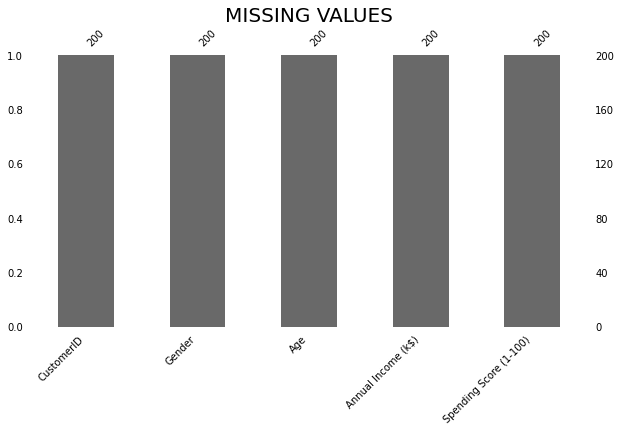

In [7]:
print('The number of rows are:',data.shape[0])
print('The number of columns are:',data.shape[1])
print('Column names:', data.columns.values)
print('\n')
print('Inspect the types of each columns')
print(data.dtypes)
print('\n')
print('Inspect the missing data')
#plot the missing data to visualize more easily 
print(data.isna().sum())

msno.bar(data,fontsize=10,figsize=(10,5))
plt.title('MISSING VALUES',fontsize=20)
plt.show()


As we can see we dont have any missing values but we need the change the values of the gender column. 

0: Male
1: Female

In [14]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)
print(data.head())
print('Inspect if the type of the columns corresponds to the new values')
print(data.dtypes)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40
Inspect if the type of the columns corresponds to the new values
CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


### 3)Univariate Analysis

In [16]:
print(data.describe())

       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


### 4) bivariate analysis
hacer un matrix correlation espues un heatmap y por ultimo un pairplot